# Can you trust Fandango? Analysis of movie ratings 2015 vs 2016

A data journalist named Walt Hickey revealed that the actual rating of movies on Fandango website is lower than star rating. Fandango displays a 5-star rating system on their website, where the smallest rating is 0 stars and the largest is 5 stars. 

Here are some examples of Hickey's findings:

The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect;

In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars;

The aim of the project is to identify any changes in Fandango's rating system after Hickey's analysis.

To achieve the aim we will compare the system's characteristics previous and after Hickey's analysis. We will use graphs of ratings distributions, probability tables, and some descriptive statistics. 

- Walt Hickey's data available [here](https://github.com/fivethirtyeight/data/tree/master/fandango);
- Movie ratings for 2016 available [here](https://github.com/mircealex/Movie_ratings_2016_17);

### Summary of the results

After the data analysis, we can conclude that there were no significant changes in Fandango's system. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_columns', 50)
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 5000)

# Read cvs files to Pandas dataframe
hickey_data = pd.read_csv('fandango_score_comparison.csv')
dq_data = pd.read_csv('movie_ratings_16_17.csv')

## Explore datasets
We will now explore Hickey's data set. The documentation available [here](https://github.com/fivethirtyeight/data/tree/master/fandango). 

In [2]:
print(hickey_data.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm  Metacritic_norm  Metacritic_user_nom  IMDB_norm  \
0     3.7

The next step is to explore DQ data set. The documentation available [here](https://github.com/mircealex/Movie_ratings_2016_17). 

In [3]:
print(dq_data.head())

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2 

Next, we isolate data for Fandango in separate datasets. 

In [4]:
hickey_fn = hickey_data[['FILM', 'Fandango_Stars',
                        'Fandango_Ratingvalue',
                        'Fandango_votes',
                        'Fandango_Difference']]
dq_fn = dq_data[['movie', 'year', 'fandango']]

## Cheking data representativity

To achieve our goal we can compare Fandango's ratings for 2015 and 2016 and check if there is any difference. We should explore columns Fandango_Stars in hickey_fn dataset and fandango in the dq_fn dataset.

But, according to documentation the Hickeys data "contains every film that has a Rotten Tomatoes rating, an RT User rating, a Metacritic score, a Metacritic User score, and IMDb score and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.". For this project, we will consider this as a population of interest. But I'd rather prefer to see all films from Fandango website (the full population) or a random sample of these films. Here we see that some predefined criteria were implemented. 

According to documentation the Data Quest data "contains movie rating data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.". Again, we will consider this as a population for this project, despite that there are some predefined criteria too. 

So, we are going to compare the following populations in our analysis:

- Fandango's ratings for popular movies released in 2015;
- Fandango's ratings for popular movies released in 2016;

We consider a movie as popular if it has 30 or more reviews in Fandango. Let's check if we meet this criterion for all movies in our datasets.

In [5]:
print(hickey_fn[hickey_fn['Fandango_votes'] < 30])

Empty DataFrame
Columns: [FILM, Fandango_Stars, Fandango_Ratingvalue, Fandango_votes, Fandango_Difference]
Index: []


As we received empty dataset all movies can be considered as popular. 

For the Data Quest, we will randomly sample 10 movies and check their ratings on Fandango. If at least 80% will have a high number of voters (30 or more) we will consider them as popular. 

In [6]:
# Sample 10 random films
print(dq_fn.sample(n=10, random_state=1))

                                       movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5


We received the same list as Data Quest team as the same random seed was used. As the list contains 90% movies which meet our criterion of popularity we can use it for further analysis. 

In [7]:
# Store data for each year in the separate dataset
movies_2015 = hickey_fn[hickey_fn['FILM']
                        .str.contains('2015')]
movies_2016 = dq_fn[dq_fn['year'] == 2016]

# Explore the number of rows in every dataset
print(movies_2015.shape[0])
print(movies_2016.shape[0])

129
191


## Investigate difference in movie ratings 2015 vs 2016

First we will compare shapes of the distributions of ratings for both samples.

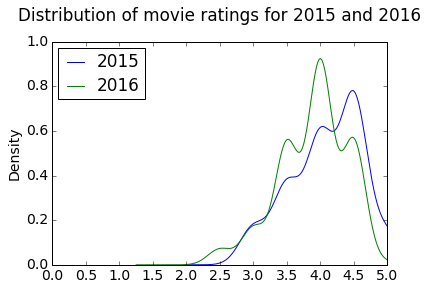

In [8]:
# Generate kernel density plot
movies_2015['Fandango_Stars'].plot.kde(
    label='2015', legend=True)
movies_2016['fandango'].plot.kde(
    label='2016',
    legend=True,
    xlim=(0, 5),
    xticks=np.arange(0, 5.5, 0.5))
plt.title('Distribution of movie ratings for 2015 and 2016',
           y=1.07)
plt.style.use('fivethirtyeight')

We can see from the graphs:

- both of them skewed to the left, so there are more high ratings than lower ones. But, if we looked more closely on interval 3 - 5 for distribution of 2016 it looks very like a normal distribution;
- 2015 distribution contains more ratings of 4.5 and 5 and 2016 one contains more 4 ratings;
- we can conclude that there are some changes towards lower ratings from 2015 to 2016. We can assume that Fandango made some changes in their system;

Let's analyze data more granually using distribution tables.

In [9]:
(movies_2015['Fandango_Stars']
 .value_counts(normalize=True)
 .sort_index())

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [10]:
(movies_2016['fandango']
 .value_counts(normalize=True)
 .sort_index())

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

The percentage of films with high ratings (5.0, 4.5) and percentage of films is lower ratings (4.0, 3.5, 3.0) increased. The films with rating 2.5 appeared in 2016. There is a clear direction towards lower ratings. 
Let's explore some summary statistic. 

In [11]:
# Compute summary statistics for 2015 and 2016
for y, d in [('2015', movies_2015['Fandango_Stars']),
            ('2016', movies_2016['fandango'])]:
    print('Mode {}: {}'.format(y, d.mode()[0]))
    print('Median {}: {}'.format(y, d.median()))
    print('Mean {}: {}'.format(y, d.mean()))
    print()


Mode 2015: 4.5
Median 2015: 4.0
Mean 2015: 4.0852713178294575

Mode 2016: 4.0
Median 2016: 4.0
Mean 2016: 3.887434554973822



We will create group bar chart to reflect these statistics.

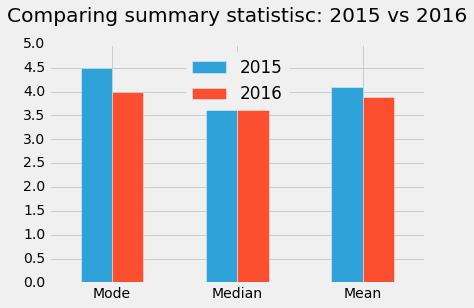

In [12]:
# Create dictionary which contains data on summary
# statistics
data = {}
for y, d in [('2015', movies_2015['Fandango_Stars']),
            ('2016', movies_2016['fandango'])]:
    data[y] = [d.mode()[0], d.median(), d.mean()]

# Create Pandas dataframe with the data above
data = pd.DataFrame(
    data,
    index = ['Mode', 'Median', 'Mean']
    
# Plot group bar chart
)
data.plot.bar(
    rot=0,
    ylim=(0, 5),
    yticks=np.arange(0, 5.5, 0.5)
)
plt.title(
    'Comparing summary statistisc: 2015 vs 2016',
    y=1.07
)
plt.legend(loc='upper center')

We can see from the data and the plot the median remains the same, but mode and mean have become lower. It shows that ratings tend to become lower. Yet, there is only a slight difference. 

## Conclusion 

The aim of the project is to identify any changes in Fandango's rating system after Hickey's analysis.

During data analysis we revealed that:

- the ratings in 2016 is a bit lower than in 2015;

- but the difference is not significant;

We can conclude that Fandango made some changes in their system.  However, these changes do not affect star rating significantly.